## 🔹 Object Tracking

### Task 3: Classical Object Tracking using OpenCV

**Goal:** Implement traditional tracking algorithms using OpenCV.

**Suggested Trackers:**

- KCF
- CSRT
- MOSSE

**Instructions:**

1. Use a **short video** (e.g., pedestrians, cars, or sports).
   - You can download public videos from [Pexels Videos](https://www.pexels.com/videos/) or [MOT Challenge dataset](https://motchallenge.net/).
2. Define an initial bounding box.
3. Apply **two different OpenCV trackers** (e.g., KCF and CSRT).
4. Compare:
   - Tracking stability
   - Frame rate (FPS)
   - Failure cases (drift, loss, occlusion)

**Deliverables:**

- Output video or GIF with tracking visualization
- Comparison table (FPS, success rate, drift cases)
- Short discussion on performance trade-offs

---

In [10]:
import pandas as pd
import time
import cv2
import sys
from IPython.display import display

In [11]:
video_path = "backpack.mp4" 
video = cv2.VideoCapture(video_path)

In [12]:
ret, frame = video.read()
if not ret:
    print("Error reading first frame.")
    video.release()
    exit()

bbox = cv2.selectROI("Select Object to Track", frame, fromCenter=False, showCrosshair=True)
cv2.destroyAllWindows()
print("Initial bounding box:", bbox)
video.release()

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Initial bounding box: (830, 744, 92, 127)


In [13]:


# Otwórz wideo
video = cv2.VideoCapture("backpack.mp4")
ret, frame = video.read()
if not ret:
    print("Error reading first frame.")
    video.release()
    exit()

# Pobierz rozmiar ekranu (działa na większości systemów)
screen_width = 1280
screen_height = 720

# Sprawdź rozmiar klatki
h, w = frame.shape[:2]

# Oblicz skalę dopasowania do ekranu
scale = min(screen_width / w, screen_height / h)
new_w, new_h = int(w * scale), int(h * scale)

# Zmień rozmiar klatki
resized_frame = cv2.resize(frame, (new_w, new_h))

# Wybierz ROI na zmniejszonej klatce
bbox_scaled = cv2.selectROI("Select Object to Track", resized_frame, fromCenter=False, showCrosshair=True)
cv2.destroyAllWindows()

# Przeskaluj współrzędne ROI z powrotem do oryginalnych rozmiarów
x, y, bw, bh = bbox_scaled
bbox = (int(x / scale), int(y / scale), int(bw / scale), int(bh / scale))

print("Initial bounding box:", bbox)
video.release()


Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Initial bounding box: (843, 751, 67, 112)


In [14]:
# Trackers initialization 
tracker_kcf = cv2.legacy.TrackerKCF_create()
tracker_csrt = cv2.legacy.TrackerCSRT_create()
tracker_mosse = cv2.legacy.TrackerMOSSE_create()

cap_kcf = cv2.VideoCapture(video_path)
cap_csrt = cv2.VideoCapture(video_path)
cap_mosse = cv2.VideoCapture(video_path)

# Reading first frames
ret1, frame1 = cap_kcf.read()
ret2, frame2 = cap_csrt.read()
ret3, frame3 = cap_mosse.read()

# Tracker initialization with bounding box
tracker_kcf.init(frame1, bbox)
tracker_csrt.init(frame2, bbox)
tracker_mosse.init(frame3, bbox)

True

In [15]:
# Prepare output videos
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out_kcf = cv2.VideoWriter('output_kcf.mp4', fourcc, 20.0, (frame1.shape[1], frame1.shape[0]))
out_csrt = cv2.VideoWriter('output_csrt.mp4', fourcc, 20.0, (frame2.shape[1], frame2.shape[0]))
out_mosse = cv2.VideoWriter('output_mosse.mp4', fourcc, 20.0, (frame3.shape[1], frame3.shape[0]))

# Metrics
total_time = {"KCF": 0.0, "CSRT": 0.0, "MOSSE": 0.0}
tracked_frames = {"KCF": 0, "CSRT": 0, "MOSSE": 0}
failures = {"KCF": 0, "CSRT": 0, "MOSSE": 0}

In [16]:

while True:
    # Read frames
    ret1, frame1 = cap_kcf.read()
    ret2, frame2 = cap_csrt.read()
    ret3, frame3 = cap_mosse.read()
    if not (ret1 and ret2 and ret3):
        break

    # KCF tracker
    start = time.time()
    success1, box1 = tracker_kcf.update(frame1)
    end = time.time()
    total_time["KCF"] += (end - start)
    tracked_frames["KCF"] += 1
    if success1:
        x, y, w, h = [int(v) for v in box1]
        cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
    else:
        failures["KCF"] += 1
        cv2.putText(frame1, "Tracking failure", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.putText(frame1, f"KCF Frames: {tracked_frames['KCF']}", (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    out_kcf.write(frame1)

    # CSRT tracker
    start = time.time()
    success2, box2 = tracker_csrt.update(frame2)
    end = time.time()
    total_time["CSRT"] += (end - start)
    tracked_frames["CSRT"] += 1
    if success2:
        x, y, w, h = [int(v) for v in box2]
        cv2.rectangle(frame2, (x, y), (x + w, y + h), (255, 0, 0), 2)
    else:
        failures["CSRT"] += 1
        cv2.putText(frame2, "Tracking failure", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.putText(frame2, f"CSRT Frames: {tracked_frames['CSRT']}", (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    out_csrt.write(frame2)

    # MOSSE tracker
    start = time.time()
    success3, box3 = tracker_mosse.update(frame3)
    end = time.time()
    total_time["MOSSE"] += (end - start)
    tracked_frames["MOSSE"] += 1
    if success3:
        x, y, w, h = [int(v) for v in box3]
        cv2.rectangle(frame3, (x, y), (x + w, y + h), (0, 0, 255), 2)
    else:
        failures["MOSSE"] += 1
        cv2.putText(frame3, "Tracking failure", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.putText(frame3, f"MOSSE Frames: {tracked_frames['MOSSE']}", (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    out_mosse.write(frame3)

cap_kcf.release()
cap_csrt.release()
cap_mosse.release()
out_kcf.release()
out_csrt.release()
out_mosse.release()
cv2.destroyAllWindows()

# Computing FPS
fps = {k: (tracked_frames[k] / total_time[k]) for k in tracked_frames}
success_rate = {k: (tracked_frames[k] - failures[k]) / tracked_frames[k] for k in tracked_frames}

df_results = pd.DataFrame({
    "Tracker": ["KCF", "CSRT", "MOSSE"],
    "FPS": [fps["KCF"], fps["CSRT"], fps["MOSSE"]],
    "Success Rate": [success_rate["KCF"], success_rate["CSRT"], success_rate["MOSSE"]],
    "Failure Count": [failures["KCF"], failures["CSRT"], failures["MOSSE"]]
})
display(df_results)

,Tracker,FPS,Success Rate,Failure Count
0,KCF,362.308500,0.929185,33
1,CSRT,60.154474,1.000000,0
2,MOSSE,2681.500431,0.995708,2


### Results    
* FPS: MOSSE was the fastest tracker, which can be very good for real-time applications, while CSRT tracker was the slowest.
* Success rate and failure count: CSRT achieved 100% succes rate with no failures. KFC had 93% success rate, with 33 failures.
* CSRT is slow and computationally demanding, but at the same time is very reliable.
* MOSSE is very fast and compiutationally light, but allows some mistakes.
* KFC offers moderate FPS, but it failed lots of times and it seems to be the least reliable.

### Stability and Bounding Box accuracy     
KCF - CSRT - MOSSE

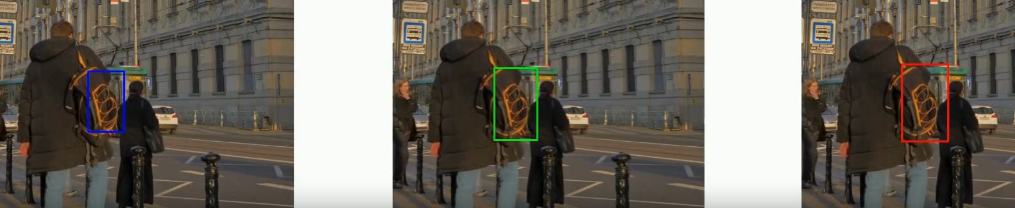

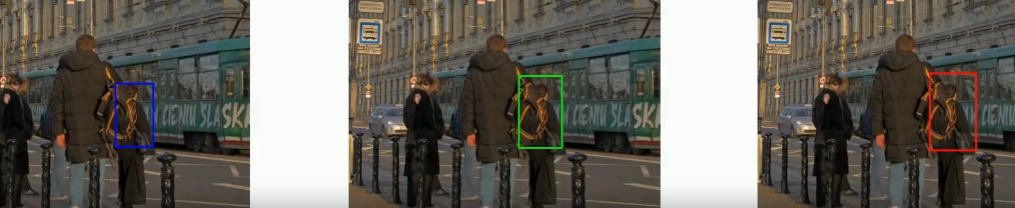

* As the given screenshots show, each algorithm places bounding box in slightly different place. In the above examples, CSRT seems to have the worst bounding box accuracy, as it doesn't cover the whole backpack. ALthough all algorithms work quite good in given video.  
* After watching the output video, CSRT bounding box seems to be the least stable - it is slightly vibrating. The most stable bounding box comes frome MOSSE algorithm.
* Despite different FPS, the visual tracking was fluent in all algorithms.